# Estimação de preços de diamantes

Conjunto de dados obtido via Kaggle.

In [1]:
# carregar bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
%matplotlib inline

## Leitura e análise do conjunto de dados

In [2]:
# carregar os dados
df = pd.read_csv("diamantes.csv")
df.head()

,carat,cut,color,clarity,x,y,z,price
0,0.23,Ideal,E,SI2,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,4.34,4.35,2.75,335


In [3]:
df.describe()

,carat,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.121761,1.142135,0.705699,3989.439738
min,0.200000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,10.740000,58.900000,31.800000,18823.000000


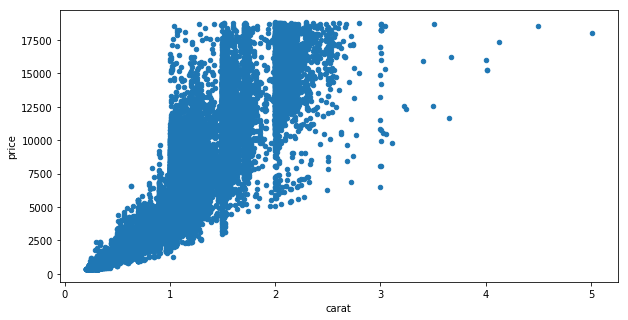

In [4]:
df.plot.scatter(x="carat", y="price", figsize=(10,5))

## Preparação dos dados

In [5]:
# https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d
class OrdinaryEncoder:
    def __init__(self, columns = None):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [6]:
# cópia do df, que será modificada
data = shuffle(df.copy())

# X é a matriz com as entradas, y é a matriz com as saídas
y = data.pop("price")
X = data

print("Conjunto total: ", X.shape, y.shape)

Conjunto total:  (53940, 7) (53940,)


## Treinamento e validação cruzada

In [7]:
reg = make_pipeline(OrdinaryEncoder(['cut', 'color', 'clarity']), RandomForestRegressor(n_jobs=4, max_depth=15))
reg.fit(X, y)
y_pred = reg.predict(X)
print("Erro médio     : US$", metrics.mean_absolute_error(y, y_pred))

print('-' * 50)
print("\nValidação cruzada\n")

erro = model_selection.cross_val_score(reg, X, y, cv=5, scoring='neg_mean_absolute_error')
print("Erro médio: US$", -np.mean(erro))

erro = model_selection.cross_val_score(reg, X, y, cv=5, scoring='r2')
print("R²        : {:.2f}".format(np.mean(erro)))

Erro médio     : US$ 173.815098786
--------------------------------------------------

Validação cruzada

Erro médio: US$ 283.848729402
R²        : 0.98
